# What Stats are Most Correlated to Success in the 2023 - 2024 Premier League Season?

In [1]:
import pandas as pd

In [2]:
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')

In [3]:
#print tables from webpage. use index number to print the tables I want to extract and analyze data from

In [4]:
#want tables with index 0, 2 and 3
table_index = 0
table_index_for = 2
table_index_against = 3
df_table = df[table_index]
df_standard_for = df[table_index_for]
df_standard_against = df[table_index_against]

In [5]:
df_standard_for.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl                Age               Poss   
0            Arsenal                 25               25.7               59.5   
1        Aston Villa                 30               27.6               54.5   
2        Bournemouth                 28               26.5               45.1   
3          Brentford                 28               27.4               44.2   
4           Brighton                 29               26.7               61.3   

  Playing Time                    Performance      ... Per 90 Minutes        \
            MP Starts   Min   90s         Gls Ast  ...            Gls   Ast   
0           32    352  2880  32.0          71  50  ...           2.22  1.56   
1           33    363  2970  33.0          65  48  ...           1.97  1.45   
2           32    352  2880  32.0          46  35  ...           1.44  1.09   
3           33    363  2970  33.0          45  30  ...           1.36  0.91   
4           32    352  2880  32.0          47  35  ...           1.47  1.09   

                                                        
    G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0  3.78  1.94   3.50  1.97  1.38   3.35  1.75     3.14  
1  3.42  1.85   3.30  1.69  1.26   2.95  1.60     2.86  
2  2.53  1.41   2.50  1.47  1.08   2.55  1.42     2.50  
3  2.27  1.27   2.18  1.56  1.13   2.68  1.49     2.62  
4  2.56  1.31   2.41  1.51  1.11   2.62  1.40     2.51  

[5 rows x 32 columns]

In [6]:
df_standard_for.columns

MultiIndex([('Unnamed: 0_level_0',    'Squad'),
            ('Unnamed: 1_level_0',     '# Pl'),
            ('Unnamed: 2_level_0',      'Age'),
            ('Unnamed: 3_level_0',     'Poss'),
            (      'Playing Time',       'MP'),
            (      'Playing Time',   'Starts'),
            (      'Playing Time',      'Min'),
            (      'Playing Time',      '90s'),
            (       'Performance',      'Gls'),
            (       'Performance',      'Ast'),
            (       'Performance',      'G+A'),
            (       'Performance',     'G-PK'),
            (       'Performance',       'PK'),
            (       'Performance',    'PKatt'),
            (       'Performance',     'CrdY'),
            (       'Performance',     'CrdR'),
            (          'Expected',       'xG'),
            (          'Expected',     'npxG'),
            (          'Expected',      'xAG'),
            (          'Expected', 'npxG+xAG'),
            (       'Progression',     '

In [7]:
#check the number of levels in the MultiIndex columns
num_levels = df_standard_for.columns.nlevels
if num_levels > 1:
    df_standard_for.columns = df_standard_for.columns.droplevel(0)

#view column names
df_standard_for.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [8]:
#check the number of levels in the MultiIndex columns
num_levels = df_standard_against.columns.nlevels
if num_levels > 1:
    df_standard_against.columns = df_standard_against.columns.droplevel(0)

#view column names
df_standard_against.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [9]:
#dataframe with first index of columns removed
df_standard_against.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,vs Arsenal,25,27.2,40.5,32,352,2880,32.0,25,20,...,0.78,0.62,1.41,0.75,1.37,0.69,0.51,1.20,0.65,1.15
1,vs Aston Villa,30,27.1,45.5,33,363,2970,33.0,46,39,...,1.39,1.18,2.58,1.39,2.58,1.51,1.29,2.80,1.51,2.80
2,vs Bournemouth,28,27.0,54.9,32,352,2880,32.0,56,36,...,1.75,1.13,2.87,1.59,2.72,1.52,1.01,2.54,1.37,2.38
3,vs Brentford,28,26.8,55.8,33,363,2970,33.0,58,46,...,1.76,1.39,3.15,1.70,3.09,1.49,1.20,2.69,1.44,2.64
4,vs Brighton,29,27.1,38.7,32,352,2880,32.0,48,32,...,1.50,1.00,2.50,1.31,2.31,1.47,1.01,2.48,1.32,2.33


In [10]:
df_table.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,32,22,7,3,76,32,44,73,2.28,67.1,30.6,36.5,1.14,D D W W W,52923,Erling Haaland - 20,Ederson,NaN
1,2,Arsenal,32,22,5,5,75,26,49,71,2.22,62.9,22.2,40.7,1.27,W D W W L,60224,Bukayo Saka - 14,David Raya,NaN
2,3,Liverpool,32,21,8,3,72,31,41,71,2.22,73.4,38.2,35.3,1.10,D W W D L,55498,Mohamed Salah - 17,Alisson,NaN
3,4,Aston Villa,33,19,6,8,68,49,19,63,1.91,55.8,49.8,6.0,0.18,D W L D W,41950,Ollie Watkins - 19,Emiliano Martínez,NaN
4,5,Tottenham,32,18,6,8,65,49,16,60,1.88,55.5,52.9,2.6,0.08,L W D W L,61525,Son Heung-min - 15,Guglielmo Vicario,NaN


In [11]:
#drop unwanted columns
#create per 90 stats for things like goals, assists, etc.
#correlation testing
#match teams up for next GW

In [12]:
df_table.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [13]:
df_standard_for.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [14]:
df_standard_against.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [15]:
#create new dataframes with only the columns we want to use
selected_table = df_table[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90']]
selected_for = df_standard_for[['Squad', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK', 'xG+xAG']]
selected_against = df_standard_against[['Squad', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK', 'xG+xAG']]

In [16]:
selected_table.head(2)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,Manchester City,32,22,7,3,76,32,44,73,2.28,67.1,30.6,36.5,1.14
1,2,Arsenal,32,22,5,5,75,26,49,71,2.22,62.9,22.2,40.7,1.27


In [17]:
selected_for.head(2)

,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,59.5,71,2.22,50,1.56,121,3.78,62,1.94,...,56.1,1.75,44.3,1.38,100.3,3.14,701,1795,3.5,3.35
1,Aston Villa,54.5,65,1.97,48,1.45,113,3.42,61,1.85,...,52.8,1.60,41.5,1.26,94.3,2.86,704,1325,3.3,2.95


In [18]:
selected_against.head(2)

,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,vs Arsenal,40.5,25,0.78,20,0.62,45,1.41,24,0.75,...,20.7,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.2
1,vs Aston Villa,45.5,46,1.39,39,1.18,85,2.58,46,1.39,...,49.8,1.51,42.6,1.29,92.4,2.80,531,1054,2.58,2.8


In [19]:
#remove "vs " from stats against to normalize 'Squad' across the dataframes
selected_against['Squad'] = selected_for['Squad'].str.replace('vs ', '', regex = False)
selected_against.head()

/var/folders/jp/3fktnqd5023f4kfkp0wgrq4w0000gn/T/ipykernel_77346/4147698335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_against['Squad'] = selected_for['Squad'].str.replace('vs ', '', regex = False)


,Squad,Poss,Gls,Gls,Ast,Ast,G+A,G+A,G-PK,G-PK,...,npxG,npxG,xAG,xAG,npxG+xAG,npxG+xAG,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,40.5,25,0.78,20,0.62,45,1.41,24,0.75,...,20.7,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.20
1,Aston Villa,45.5,46,1.39,39,1.18,85,2.58,46,1.39,...,49.8,1.51,42.6,1.29,92.4,2.80,531,1054,2.58,2.80
2,Bournemouth,54.9,56,1.75,36,1.13,92,2.87,51,1.59,...,43.9,1.37,32.4,1.01,76.3,2.38,603,1269,2.72,2.54
3,Brentford,55.8,58,1.76,46,1.39,104,3.15,56,1.70,...,47.6,1.44,39.6,1.20,87.2,2.64,735,1418,3.09,2.69
4,Brighton,38.7,48,1.50,32,1.00,80,2.50,42,1.31,...,42.3,1.32,32.3,1.01,74.6,2.33,528,991,2.31,2.48


In [20]:
selected_for.columns

Index(['Squad', 'Poss', 'Gls', 'Gls', 'Ast', 'Ast', 'G+A', 'G+A', 'G-PK',
       'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'xG', 'npxG', 'npxG',
       'xAG', 'xAG', 'npxG+xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'G+A-PK',
       'xG+xAG'],
      dtype='object')

In [21]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A
Index: 8, Column Name: G-PK
Index: 9, Column Name: G-PK
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [22]:
#change goals - penalties with non penalty goals
new_col_for = {
    'G-PK': 'npG',
}
# Rename the columns
selected_for = selected_for.rename(columns=new_col_for)

In [23]:
#function to change the duplicate column names so that they are per 90
def rename_columns_with_suffix(selected_for):
    new_columns = []  # Initialize a list to store new column names
    seen_columns = set()  # Initialize a set to keep track of seen column names
    for col_index, column_name in enumerate(selected_for.columns):
        # Check if the column name is already in the set of seen column names
        if column_name in seen_columns:
            # If yes, add a suffix to the column name
            new_column_name = f'{column_name}/90'
        else:
            # If no, keep the original column name
            new_column_name = column_name
        new_columns.append(new_column_name)  # Add the new column name to the list
        seen_columns.add(column_name)  # Add the column name to the set of seen column names
    selected_for.columns = new_columns  # Assign the new column names to the DataFrame

# Rename columns with suffixes
rename_columns_with_suffix(selected_for)

selected_for.head()

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,59.5,71,2.22,50,1.56,121,3.78,62,1.94,...,56.1,1.75,44.3,1.38,100.3,3.14,701,1795,3.50,3.35
1,Aston Villa,54.5,65,1.97,48,1.45,113,3.42,61,1.85,...,52.8,1.60,41.5,1.26,94.3,2.86,704,1325,3.30,2.95
2,Bournemouth,45.1,46,1.44,35,1.09,81,2.53,45,1.41,...,45.4,1.42,34.5,1.08,79.9,2.50,592,1143,2.50,2.55
3,Brentford,44.2,45,1.36,30,0.91,75,2.27,42,1.27,...,49.2,1.49,37.2,1.13,86.4,2.62,413,1110,2.18,2.68
4,Brighton,61.3,47,1.47,35,1.09,82,2.56,42,1.31,...,44.8,1.40,35.4,1.11,80.2,2.51,731,1577,2.41,2.62


In [24]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [25]:
for index, column_name in enumerate(selected_against.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A
Index: 8, Column Name: G-PK
Index: 9, Column Name: G-PK
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [26]:
#change goals - penalties with non penalty goals
new_col_against = {
    'G-PK': 'npG',
}
# Rename the columns
selected_against = selected_against.rename(columns=new_col_against)

In [27]:
#function to change the duplicate column names so that they are per 90
def rename_columns_with_suffix(selected_against):
    new_columns = []  # Initialize a list to store new column names
    seen_columns = set()  # Initialize a set to keep track of seen column names
    for col_index, column_name in enumerate(selected_against.columns):
        # Check if the column name is already in the set of seen column names
        if column_name in seen_columns:
            # If yes, add a suffix to the column name
            new_column_name = f'{column_name}/90'
        else:
            # If no, keep the original column name
            new_column_name = column_name
        new_columns.append(new_column_name)  # Add the new column name to the list
        seen_columns.add(column_name)  # Add the column name to the set of seen column names
    selected_against.columns = new_columns  # Assign the new column names to the DataFrame

# Rename columns with suffixes
rename_columns_with_suffix(selected_against)

selected_against.head()

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,40.5,25,0.78,20,0.62,45,1.41,24,0.75,...,20.7,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.20
1,Aston Villa,45.5,46,1.39,39,1.18,85,2.58,46,1.39,...,49.8,1.51,42.6,1.29,92.4,2.80,531,1054,2.58,2.80
2,Bournemouth,54.9,56,1.75,36,1.13,92,2.87,51,1.59,...,43.9,1.37,32.4,1.01,76.3,2.38,603,1269,2.72,2.54
3,Brentford,55.8,58,1.76,46,1.39,104,3.15,56,1.70,...,47.6,1.44,39.6,1.20,87.2,2.64,735,1418,3.09,2.69
4,Brighton,38.7,48,1.50,32,1.00,80,2.50,42,1.31,...,42.3,1.32,32.3,1.01,74.6,2.33,528,991,2.31,2.48


In [28]:
for index, column_name in enumerate(selected_for.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [29]:
for index, column_name in enumerate(selected_against.columns):
    print(f"Index: {index}, Column Name: {column_name}")

Index: 0, Column Name: Squad
Index: 1, Column Name: Poss
Index: 2, Column Name: Gls
Index: 3, Column Name: Gls/90
Index: 4, Column Name: Ast
Index: 5, Column Name: Ast/90
Index: 6, Column Name: G+A
Index: 7, Column Name: G+A/90
Index: 8, Column Name: npG
Index: 9, Column Name: npG/90
Index: 10, Column Name: PK
Index: 11, Column Name: PKatt
Index: 12, Column Name: CrdY
Index: 13, Column Name: CrdR
Index: 14, Column Name: xG
Index: 15, Column Name: xG/90
Index: 16, Column Name: npxG
Index: 17, Column Name: npxG/90
Index: 18, Column Name: xAG
Index: 19, Column Name: xAG/90
Index: 20, Column Name: npxG+xAG
Index: 21, Column Name: npxG+xAG/90
Index: 22, Column Name: PrgC
Index: 23, Column Name: PrgP
Index: 24, Column Name: G+A-PK
Index: 25, Column Name: xG+xAG


In [30]:
selected_for.head(1)

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,59.5,71,2.22,50,1.56,121,3.78,62,1.94,...,56.1,1.75,44.3,1.38,100.3,3.14,701,1795,3.5,3.35


In [31]:
selected_against.head(1)

,Squad,Poss,Gls,Gls/90,Ast,Ast/90,G+A,G+A/90,npG,npG/90,...,npxG,npxG/90,xAG,xAG/90,npxG+xAG,npxG+xAG/90,PrgC,PrgP,G+A-PK,xG+xAG
0,Arsenal,40.5,25,0.78,20,0.62,45,1.41,24,0.75,...,20.7,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.2


In [32]:
selected_table.head(1)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,1,Manchester City,32,22,7,3,76,32,44,73,2.28,67.1,30.6,36.5,1.14


In [33]:
#create new table df with just squad and points per match played
table_pts_mp = selected_table[['Squad','Pts/MP','Pts']]
table_pts_mp.head(1)

,Squad,Pts/MP,Pts
0,Manchester City,2.28,73


In [34]:
against_copy = selected_against.copy()
for_copy = selected_for.copy()
table_copy = table_pts_mp.copy()

In [35]:
#correlate stats for and against with points per match

merged_stats = pd.merge(selected_for, selected_against, on ='Squad')

numeric_columns_merged = merged_stats.select_dtypes(include=['float64', 'int64'])

corr_merged_pts_mp = numeric_columns_merged.corrwith(table_pts_mp['Pts/MP'])

print(corr_merged_pts_mp)

Poss_x           0.243710
Gls_x            0.198727
Gls/90_x         0.196803
Ast_x            0.131988
Ast/90_x         0.129172
G+A_x            0.171186
G+A/90_x         0.166104
npG_x            0.187678
npG/90_x         0.185506
PK_x             0.147050
PKatt_x          0.131428
CrdY_x          -0.269249
CrdR_x          -0.136607
xG_x             0.248750
xG/90_x          0.241241
npxG_x           0.254629
npxG/90_x        0.244603
xAG_x            0.252021
xAG/90_x         0.244354
npxG+xAG_x       0.254024
npxG+xAG/90_x    0.248721
PrgC_x           0.164342
PrgP_x           0.268660
G+A-PK_x         0.159824
xG+xAG_x         0.244017
Poss_y          -0.243710
Gls_y           -0.285226
Gls/90_y        -0.292598
Ast_y           -0.216000
Ast/90_y        -0.223200
G+A_y           -0.258188
G+A/90_y        -0.266458
npG_y           -0.211452
npG/90_y        -0.216098
PK_y            -0.426828
PKatt_y         -0.442095
CrdY_y           0.085678
CrdR_y           0.143319
xG_y        

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#added points per match to stats dataframe

merged_df = pd.merge(table_pts_mp, merged_stats, on='Squad')

In [38]:
merged_df.head()

,Squad,Pts/MP,Pts,Poss_x,Gls_x,Gls/90_x,Ast_x,Ast/90_x,G+A_x,G+A/90_x,...,npxG_y,npxG/90_y,xAG_y,xAG/90_y,npxG+xAG_y,npxG+xAG/90_y,PrgC_y,PrgP_y,G+A-PK_y,xG+xAG_y
0,Manchester City,2.28,73,65.9,74,2.31,54,1.69,128,4.00,...,28.2,0.88,22.9,0.71,51.1,1.60,395,688,1.59,1.67
1,Arsenal,2.22,71,59.5,71,2.22,50,1.56,121,3.78,...,20.7,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.20
2,Liverpool,2.22,71,61.0,68,2.12,52,1.62,120,3.75,...,37.4,1.17,27.4,0.86,64.8,2.03,464,1003,1.47,2.05
3,Aston Villa,1.91,63,54.5,65,1.97,48,1.45,113,3.42,...,49.8,1.51,42.6,1.29,92.4,2.80,531,1054,2.58,2.80
4,Tottenham,1.88,60,61.5,60,1.87,51,1.59,111,3.47,...,48.7,1.52,35.1,1.10,83.7,2.62,456,921,2.25,2.75


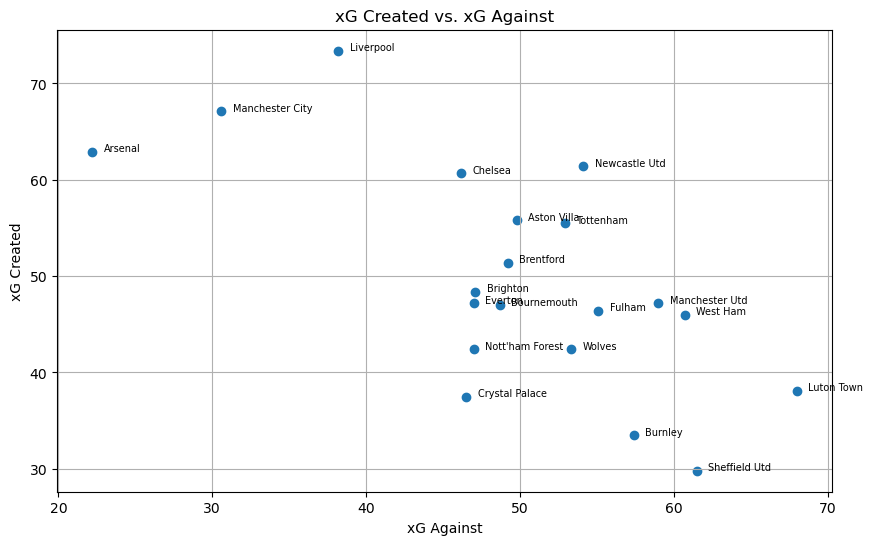

In [39]:
#scatter plot xG Created vs. xG Against

plt.figure(figsize = (10,6))
plt.scatter(merged_df['xG_y'], merged_df['xG_x'])

offset = 0.75
for i, row in merged_df.iterrows():
    plt.text(row['xG_y'] + offset, row['xG_x'], row['Squad'], fontsize = 7)

plt.title('xG Created vs. xG Against')
plt.xlabel('xG Against')
plt.ylabel('xG Created')
plt.grid(True)
plt.show()

In [40]:
#created xG against variable in merged dataframe

merged_df['xGD'] = merged_df['xG_x'] - merged_df['xG_y']
merged_df.head()

,Squad,Pts/MP,Pts,Poss_x,Gls_x,Gls/90_x,Ast_x,Ast/90_x,G+A_x,G+A/90_x,...,npxG/90_y,xAG_y,xAG/90_y,npxG+xAG_y,npxG+xAG/90_y,PrgC_y,PrgP_y,G+A-PK_y,xG+xAG_y,xGD
0,Manchester City,2.28,73,65.9,74,2.31,54,1.69,128,4.00,...,0.88,22.9,0.71,51.1,1.60,395,688,1.59,1.67,36.5
1,Arsenal,2.22,71,59.5,71,2.22,50,1.56,121,3.78,...,0.65,16.2,0.51,36.9,1.15,438,745,1.37,1.20,40.7
2,Liverpool,2.22,71,61.0,68,2.12,52,1.62,120,3.75,...,1.17,27.4,0.86,64.8,2.03,464,1003,1.47,2.05,35.2
3,Aston Villa,1.91,63,54.5,65,1.97,48,1.45,113,3.42,...,1.51,42.6,1.29,92.4,2.80,531,1054,2.58,2.80,6.0
4,Tottenham,1.88,60,61.5,60,1.87,51,1.59,111,3.47,...,1.52,35.1,1.10,83.7,2.62,456,921,2.25,2.75,2.6


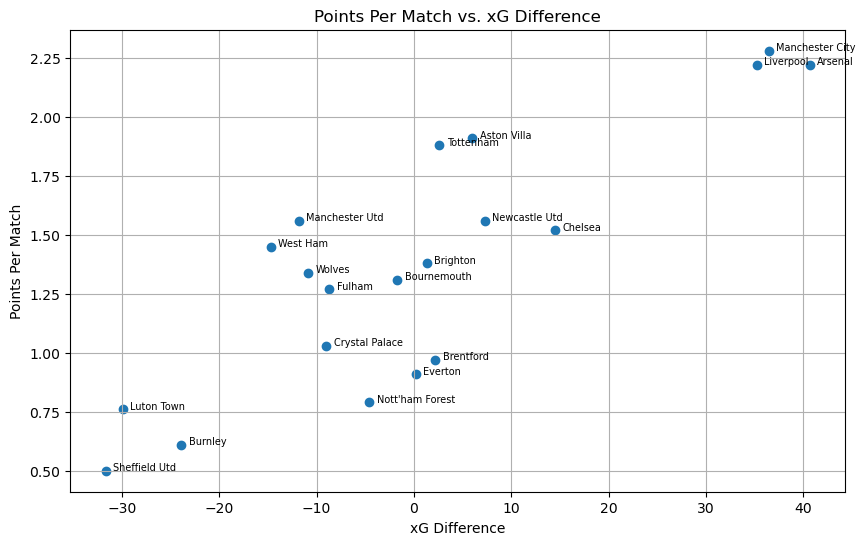

In [41]:
#scatter plot of Points Per Match and xG Difference

plt.figure(figsize = (10,6))
plt.scatter(merged_df['xGD'], merged_df['Pts/MP'])

offset = 0.75
for i, row in merged_df.iterrows():
    plt.text(row['xGD'] + offset, row['Pts/MP'], row['Squad'], fontsize = 7)

plt.title('Points Per Match vs. xG Difference')
plt.xlabel('xG Difference')
plt.ylabel('Points Per Match')
plt.grid(True)
plt.show()

In [42]:
merged_df.columns

Index(['Squad', 'Pts/MP', 'Pts', 'Poss_x', 'Gls_x', 'Gls/90_x', 'Ast_x',
       'Ast/90_x', 'G+A_x', 'G+A/90_x', 'npG_x', 'npG/90_x', 'PK_x', 'PKatt_x',
       'CrdY_x', 'CrdR_x', 'xG_x', 'xG/90_x', 'npxG_x', 'npxG/90_x', 'xAG_x',
       'xAG/90_x', 'npxG+xAG_x', 'npxG+xAG/90_x', 'PrgC_x', 'PrgP_x',
       'G+A-PK_x', 'xG+xAG_x', 'Poss_y', 'Gls_y', 'Gls/90_y', 'Ast_y',
       'Ast/90_y', 'G+A_y', 'G+A/90_y', 'npG_y', 'npG/90_y', 'PK_y', 'PKatt_y',
       'CrdY_y', 'CrdR_y', 'xG_y', 'xG/90_y', 'npxG_y', 'npxG/90_y', 'xAG_y',
       'xAG/90_y', 'npxG+xAG_y', 'npxG+xAG/90_y', 'PrgC_y', 'PrgP_y',
       'G+A-PK_y', 'xG+xAG_y', 'xGD'],
      dtype='object')

In [43]:
columns_to_drop = ['Ast/90_x', 'G+A_x', 'G+A/90_x', 'xAG_x', 'xAG/90_x', 'npxG+xAG_x', 'npxG+xAG/90_x', 'G+A-PK_x',
                  'xG+xAG_x', 'Ast/90_y', 'Ast_y', 'G+A_y', 'G+A/90_y', 'xAG_y', 'xAG/90_y', 'npxG+xAG_y', 'npxG+xAG/90_y', 'G+A-PK_y',
                  'xG+xAG_y']

# Use the drop method to remove the specified columns
merged_df = merged_df.drop(columns=columns_to_drop)

# Check the new DataFrame structure to confirm columns are dropped
merged_df.columns

Index(['Squad', 'Pts/MP', 'Pts', 'Poss_x', 'Gls_x', 'Gls/90_x', 'Ast_x',
       'npG_x', 'npG/90_x', 'PK_x', 'PKatt_x', 'CrdY_x', 'CrdR_x', 'xG_x',
       'xG/90_x', 'npxG_x', 'npxG/90_x', 'PrgC_x', 'PrgP_x', 'Poss_y', 'Gls_y',
       'Gls/90_y', 'npG_y', 'npG/90_y', 'PK_y', 'PKatt_y', 'CrdY_y', 'CrdR_y',
       'xG_y', 'xG/90_y', 'npxG_y', 'npxG/90_y', 'PrgC_y', 'PrgP_y', 'xGD'],
      dtype='object')

In [44]:
rename_dict = {
    'Pts/MP': 'Points Per Match',
    'Poss_x': 'Possession For',
    'Gls_x': 'Goals For',
    'Gls/90_x': 'Goals Per 90',
    'Ast_x': 'Assists',
    'npG_x': 'Non-Penalty Goals',
    'npG/90_x': 'Non-Penalty Goals Per 90',
    'PK_x': 'Penalties For',
    'PKatt_x': 'Penalties Won',
    'CrdY_x': 'Yellow Cards',
    'CrdR_x': 'Red Cards',
    'xG_x': 'Expected Goals',
    'xG/90_x': 'Expected Goals Per 90',
    'npxG_x': 'Non-Penalty Expected Goals',
    'npxG/90_x': 'Non-Penalty Expected Goals Per 90',
    'PrgC_x': 'Progressive Carries',
    'PrgP_x': 'Progressive Passes',
    'Poss_y': 'Possession Against',
    'Gls_y': 'Goals Conceded',
    'Gls/90_y': 'Goals Conceded Per 90',
    'npG_y': 'Non-Penalty Goals Conceded',
    'npG/90_y': 'Non-Penalty Goals Conceded Per 90',
    'PK_y': 'Penalties Scored Against',
    'PKatt_y': 'Penalties Conceded',
    'CrdY_y': 'Yellow Cards Against',
    'CrdR_y': 'Red Cards Against',
    'xG_y': 'Expected Goals Against',
    'xG/90_y': 'Expected Goals Against Per 90',
    'npxG_y': 'Non-Penalty Expected Goals Against',
    'npxG/90_y': 'Non-Penalty Expected Goals Against Per 90',
    'PrgC_y': 'Progressive Carries Against',
    'PrgP_y': 'Progressive Passes Against',
    'Pts': 'Points',
    'xGD': 'Expected Goal Difference'
}

# Use the rename method to change the column names
merged_df = merged_df.rename(columns=rename_dict)

# Check the new column names to confirm changes
merged_df.columns

Index(['Squad', 'Points Per Match', 'Points', 'Possession For', 'Goals For',
       'Goals Per 90', 'Assists', 'Non-Penalty Goals',
       'Non-Penalty Goals Per 90', 'Penalties For', 'Penalties Won',
       'Yellow Cards', 'Red Cards', 'Expected Goals', 'Expected Goals Per 90',
       'Non-Penalty Expected Goals', 'Non-Penalty Expected Goals Per 90',
       'Progressive Carries', 'Progressive Passes', 'Possession Against',
       'Goals Conceded', 'Goals Conceded Per 90', 'Non-Penalty Goals Conceded',
       'Non-Penalty Goals Conceded Per 90', 'Penalties Scored Against',
       'Penalties Conceded', 'Yellow Cards Against', 'Red Cards Against',
       'Expected Goals Against', 'Expected Goals Against Per 90',
       'Non-Penalty Expected Goals Against',
       'Non-Penalty Expected Goals Against Per 90',
       'Progressive Carries Against', 'Progressive Passes Against',
       'Expected Goal Difference'],
      dtype='object')

In [45]:
merged_df.dtypes

Squad                                         object
Points Per Match                             float64
Points                                         int64
Possession For                               float64
Goals For                                      int64
Goals Per 90                                 float64
Assists                                        int64
Non-Penalty Goals                              int64
Non-Penalty Goals Per 90                     float64
Penalties For                                  int64
Penalties Won                                  int64
Yellow Cards                                   int64
Red Cards                                      int64
Expected Goals                               float64
Expected Goals Per 90                        float64
Non-Penalty Expected Goals                   float64
Non-Penalty Expected Goals Per 90            float64
Progressive Carries                            int64
Progressive Passes                            

In [46]:
merged_df['Goals For'] = merged_df['Goals For'].astype('float64')
merged_df['Non-Penalty Goals'] = merged_df['Non-Penalty Goals'].astype('float64')
merged_df['Goals Conceded'] = merged_df['Goals Conceded'].astype('float64')
merged_df['Non-Penalty Goals Conceded'] = merged_df['Non-Penalty Goals Conceded'].astype('float64')
merged_df.dtypes

Squad                                         object
Points Per Match                             float64
Points                                         int64
Possession For                               float64
Goals For                                    float64
Goals Per 90                                 float64
Assists                                        int64
Non-Penalty Goals                            float64
Non-Penalty Goals Per 90                     float64
Penalties For                                  int64
Penalties Won                                  int64
Yellow Cards                                   int64
Red Cards                                      int64
Expected Goals                               float64
Expected Goals Per 90                        float64
Non-Penalty Expected Goals                   float64
Non-Penalty Expected Goals Per 90            float64
Progressive Carries                            int64
Progressive Passes                            

In [47]:
merged_df['xG Performance'] = merged_df['Goals For'] - merged_df['Expected Goals']
merged_df['Non-Penalty xG Performance'] = merged_df['Non-Penalty Goals'] - merged_df['Non-Penalty Expected Goals']
merged_df['Non-Penalty xG Difference'] = merged_df['Non-Penalty Expected Goals'] - merged_df['Non-Penalty Expected Goals Against']
merged_df['xG Performance Against (Goals Conceded - Expected Goals Against)'] = merged_df['Goals Conceded'] - merged_df['Expected Goals Against']
merged_df['Non-Penalty xG Performance Against (Non-Penalty Goals Conceded - Non-Penalty Expected Goals Against)'] = merged_df['Non-Penalty Goals Conceded'] - merged_df['Non-Penalty Expected Goals Against']
merged_df.head()

,Squad,Points Per Match,Points,Possession For,Goals For,Goals Per 90,Assists,Non-Penalty Goals,Non-Penalty Goals Per 90,Penalties For,...,Non-Penalty Expected Goals Against,Non-Penalty Expected Goals Against Per 90,Progressive Carries Against,Progressive Passes Against,Expected Goal Difference,xG Performance,Non-Penalty xG Performance,Non-Penalty xG Difference,xG Performance Against (Goals Conceded - Expected Goals Against),Non-Penalty xG Performance Against (Non-Penalty Goals Conceded - Non-Penalty Expected Goals Against)
0,Manchester City,2.28,73,65.9,74.0,2.31,54,69.0,2.16,5,...,28.2,0.88,395,688,36.5,6.9,6.4,34.4,0.4,-0.2
1,Arsenal,2.22,71,59.5,71.0,2.22,50,62.0,1.94,9,...,20.7,0.65,438,745,40.7,8.1,5.9,35.4,2.8,3.3
2,Liverpool,2.22,71,61.0,68.0,2.12,52,62.0,1.94,6,...,37.4,1.17,464,1003,35.2,-5.4,-4.1,28.7,-9.2,-9.4
3,Aston Villa,1.91,63,54.5,65.0,1.97,48,61.0,1.85,4,...,49.8,1.51,531,1054,6.0,9.2,8.2,3.0,-3.8,-3.8
4,Tottenham,1.88,60,61.5,60.0,1.87,51,59.0,1.84,1,...,48.7,1.52,456,921,2.6,4.5,4.3,6.0,-5.9,-7.7


In [48]:
merged_df['League Position'] = merged_df.index + 1

merged_df.head()

,Squad,Points Per Match,Points,Possession For,Goals For,Goals Per 90,Assists,Non-Penalty Goals,Non-Penalty Goals Per 90,Penalties For,...,Non-Penalty Expected Goals Against Per 90,Progressive Carries Against,Progressive Passes Against,Expected Goal Difference,xG Performance,Non-Penalty xG Performance,Non-Penalty xG Difference,xG Performance Against (Goals Conceded - Expected Goals Against),Non-Penalty xG Performance Against (Non-Penalty Goals Conceded - Non-Penalty Expected Goals Against),League Position
0,Manchester City,2.28,73,65.9,74.0,2.31,54,69.0,2.16,5,...,0.88,395,688,36.5,6.9,6.4,34.4,0.4,-0.2,1
1,Arsenal,2.22,71,59.5,71.0,2.22,50,62.0,1.94,9,...,0.65,438,745,40.7,8.1,5.9,35.4,2.8,3.3,2
2,Liverpool,2.22,71,61.0,68.0,2.12,52,62.0,1.94,6,...,1.17,464,1003,35.2,-5.4,-4.1,28.7,-9.2,-9.4,3
3,Aston Villa,1.91,63,54.5,65.0,1.97,48,61.0,1.85,4,...,1.51,531,1054,6.0,9.2,8.2,3.0,-3.8,-3.8,4
4,Tottenham,1.88,60,61.5,60.0,1.87,51,59.0,1.84,1,...,1.52,456,921,2.6,4.5,4.3,6.0,-5.9,-7.7,5


In [49]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [50]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Premier League Statistical Comparison'),
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in merged_df.columns if col != 'Squad'],
        value='Expected Goal Difference',  #default value
        clearable=False,
        style={"width": "50%"}
    ),
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in merged_df.columns if col != 'Squad'],
        value='League Position',  #default value
        clearable=False,
        style={"width": "50%"}
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_graph(x_axis, y_axis):
    fig = px.scatter(merged_df, x=x_axis, y=y_axis)
                     #color='Points',  # Use 'League Position' as a color scale
                     #hover_data=[x_axis, y_axis],
                     #color_continuous_scale=px.colors.sequential.Turbo)
    

    fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')))

    for i, row in merged_df.iterrows():
        fig.add_annotation(
            x=row[x_axis],
            y=row[y_axis],
            text=row['Squad'],
            showarrow=False,
            yshift=20,
            xshift = 20 # Shift text above the markers
        )

    fig.update_layout(
        title=f'{y_axis} vs. {x_axis} - Premier League Teams',
        xaxis_title=x_axis,
        yaxis_title=y_axis,
        legend_title='Points',
        autosize=True
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

